# ii. Introduction to Python 2
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gem-epidemics/practical-epidemics/blob/master/site/source/iddinf/ii-intro-to-python-2.ipynb)

**Date**: Monday Sept 9, 2024


## LEARNING OUTCOMES

* Become familiar with key Python libraries
* Be able to read and plot epidemic data


## Key packages

In this section we will demonstrate some key Python packages such as NumPy and Pandas.

NumPy is a fundamental numerical computing library in Python, and Pandas is used for data manipulation and analysis. The two work well together and allow us to work with dataframes and arrays with relative ease.

### Numpy

The convention is to `import numpy as np` - this creates a shorthand for accessing numpy operations.

In [ ]:
import numpy as np

Arrays are frequently used in numpy as a structure for storing and retrieving data. These can be n-dimensional.







In [ ]:
# We can define an array using a list:
infection_times = np.array([1.5, 3.2, 9.0, 4.0, 4.3])

# We can then access an element of the array
# remember in Python structures are zero indexed
print(infection_times[0])

1.5


In [ ]:
# Let's define a 3-D array
connectivity_matrix = np.array([[0, 1.5, 0.25],
                                [1.5, 0, 0.5],
                                [0.25, 0.5, 0]])

# We can access elements and rows/columns in the same way
print(connectivity_matrix[0,2])

0.25


A more advance concept in numpy is broadcasting, which handles how arrays of different shapes are treated. A simple example of this is when a scalar value can be combined with an array.

In [ ]:
seq = np.array([0.0, 1.0, 1.0, 2.0, 3.0, 5.0])
scale = 10.0

print(seq * scale)

[ 0. 10. 10. 20. 30. 50.]


The `broadcast_to` function broadcasts an array to a new shape. This is useful when setting up and array that needs to mirror the shape of another variable.

In [ ]:
arr1 = np.array([[1.0, 2.0],[3.0, 4.0],[5.0, 6.0]])
arr2 = np.array([1.0, 2.0])
print('arr1 shape: \n', arr1)
print('arr2 shape: \n', arr2)

# We could then broadcast arr2 to match the shape of arr1
print('arr2 broadcasted: \n', np.broadcast_to(arr2, arr1.shape))

arr1 shape: 
 [[1. 2.]
 [3. 4.]
 [5. 6.]]
arr2 shape: 
 [1. 2.]
arr2 broadcasted: 
 [[1. 2.]
 [1. 2.]
 [1. 2.]]


### Exercises

1. Print `infection_times` from the third element.

2. Slice the 3-D array to print the first row only

3. Define an integer called `scale`, and multiply with the `connectivity_matrix`

4. Create an array of length x using `np.arange()` and use the `reshape` function to create matrices of different dimensions.

5. Have a go at adding and multiplying arrays of different dimensions.

  Keep in mind that the numpy broadcasting rule states *'In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one.'*

### Solutions


In [ ]:
# @title
# 1. Print infection_times from the third element.
print('solution 1: ', infection_times[2:])

# 2. Slice the 3-D array to print the first row only
print('solution 2: ', connectivity_matrix[0,:])

# 3. Define a float called scale. Print the outport of scale multiplied with the connectivity_matrix
scale = 1.5
print('solution 3: \n',  scale * connectivity_matrix)

# 4. Create an array of length x using `np.arange()` and use the numpy reshape function to creae matrices of differen dimensions.
arr = np.arange(18).reshape(6,3)
print('solution 4: \n',  arr)

solution 1:  [9.  4.  4.3]
solution 2:  [0.   1.5  0.25]
solution 3: 
 [[0.    2.25  0.375]
 [2.25  0.    0.75 ]
 [0.375 0.75  0.   ]]
solution 4: 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]


The `numpy.random` model provides a way of drawing samples from a probability distribution. For example, we could sample from a binomial distribution to simulate flipping a coin n number of times.

In [ ]:
# outcome of flipping a fair coin 10 times, tested 100 times.
heads = np.random.binomial(n=10, p=0.5, size=100)
print(heads)

[6 3 4 4 4 6 2 5 6 4 5 3 7 7 4 7 4 4 4 3 1 9 3 6 4 5 5 8 4 6 4 6 5 4 5 6 6
 4 7 5 6 4 5 6 5 7 8 9 6 5 6 1 6 7 4 2 3 5 4 5 7 4 5 4 6 6 8 5 5 6 4 5 5 7
 3 7 3 4 7 6 4 7 6 3 7 6 7 7 3 6 5 8 3 4 2 3 8 4 6 6]


### Pandas

Convention dictates we import pandas as pd. Although you could choose a different alias or none at all if you prefer.

In [ ]:
import pandas as pd

# Let's define a dataframe with two columns
cases = pd.DataFrame(({'total_cases': [3500, 2000, 15000, 1500, 42000],
                        'location': ['Norwich', 'Birmingham', 'Exeter', 'Leicester', 'Liverpool']}))

print(cases)

   total_cases    location
0         3500     Norwich
1         2000  Birmingham
2        15000      Exeter
3         1500   Leicester
4        42000   Liverpool


In [ ]:
# We can check the shape of the dataframe - how many rows and columns it has
print(cases.shape)

(5, 2)


In [ ]:
# We can access the columns by name
print(cases['location'])

0       Norwich
1    Birmingham
2        Exeter
3     Leicester
4     Liverpool
Name: location, dtype: object


In [ ]:
# Alternatively we can use .iloc to refer to the index location
print(cases.iloc[:,1])

0       Norwich
1    Birmingham
2        Exeter
3     Leicester
4     Liverpool
Name: location, dtype: object


In [ ]:
# Let's create a new column in our dataframe called alert. Here we set all values to a boolean False.
cases['alert'] = False
print(cases)

   total_cases    location  alert
0         3500     Norwich  False
1         2000  Birmingham  False
2        15000      Exeter  False
3         1500   Leicester  False
4        42000   Liverpool  False


In [ ]:
# We can define a conditional where the values of alert are based on the case count
# in each location

cases['alert'] = cases['total_cases'] > 5000
print(cases)

   total_cases    location  alert
0         3500     Norwich  False
1         2000  Birmingham  False
2        15000      Exeter   True
3         1500   Leicester  False
4        42000   Liverpool   True


### Exercises
1. Create a new dataframe with two columns. A location column which matches that of `cases['location']`, and a population size column.

2. Merge your new dataframe with `cases` on the column location. You could use `pd.merge` to do this.

3. Create a new column in your combined dataframe which defines the proportion of cases to population size. Round this column to 3 decimal places.

### Solutions

In [ ]:
# @title
# 1. Create a new dataframe with two columns. A location column which matches that of `cases['location']`, and a population size column.
pops = pd.DataFrame(({'location': ['Norwich', 'Birmingham', 'Exeter', 'Leicester', 'Liverpool'],
                          'pop_size': [143900, 1.146e6, 129307, 1357394, 496784]}))
print('solution 1: \n',pops)
# 2. Merge your new dataframe with `cases` on the column location.
cases_pop = pd.merge(cases, pops, on = 'location')
print('solution 2: \n', cases_pop)

# 3. Create a new column in your combined data frame which defines proportion of cases to population size.
cases_pop['prop_cases_to_pop'] = (cases_pop['total_cases']/cases_pop['pop_size']).round(3)
print('solution 3: \n', cases_pop)

solution 1: 
      location   pop_size
0     Norwich   143900.0
1  Birmingham  1146000.0
2      Exeter   129307.0
3   Leicester  1357394.0
4   Liverpool   496784.0
solution 2: 
    total_cases    location  alert   pop_size
0         3500     Norwich  False   143900.0
1         2000  Birmingham  False  1146000.0
2        15000      Exeter   True   129307.0
3         1500   Leicester  False  1357394.0
4        42000   Liverpool   True   496784.0
solution 3: 
    total_cases    location  alert   pop_size  prop_cases_to_pop
0         3500     Norwich  False   143900.0              0.024
1         2000  Birmingham  False  1146000.0              0.002
2        15000      Exeter   True   129307.0              0.116
3         1500   Leicester  False  1357394.0              0.001
4        42000   Liverpool   True   496784.0              0.085


### Reading data
Pandas is also commonly used for reading and writing data. More Pandas methods can be found here: https://pandas.pydata.org/docs/reference/general_functions.html#

Let's import an epidemic dataset straight from a github repo. We'll use a state-level US COVID-19 dataset from the New York Times' repo which details the cumulative counts of coronavirus cases in the United States. More info here: https://github.com/nytimes/covid-19-data/tree/master?tab=readme-ov-file

In [ ]:
# We need to provide a url to the raw csv file
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
state_cases = pd.read_csv(url) # for a local file you just replace the url with your file path

In [ ]:
# Let's view the first 5 rows of the data
print(state_cases.head(5))

# Let's also print out the column names
print(state_cases.columns)

         date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0
Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')


In [ ]:
# We can use panda's inbuilt function `.describe` to retrieve some descriptive statistics
state_cases.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


## Plotting

There are two main plotting libraries in Python - `Matplotlib` and `Seaborn`. In this section we will focus on Matplotlib.


In [ ]:
# import matplotlib as plt
import matplotlib.pyplot as plt

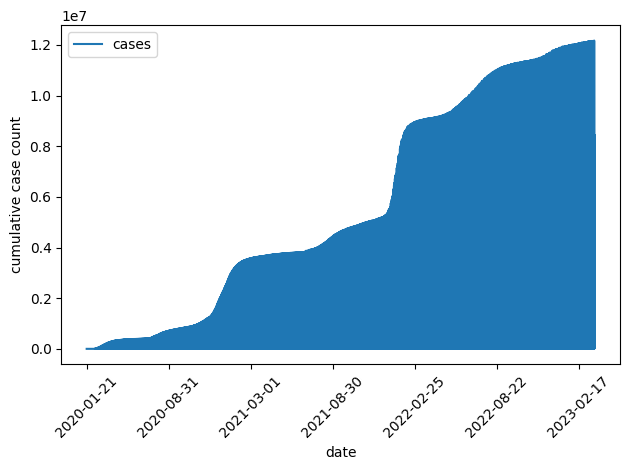

In [ ]:
# Let's plot the cases data across all states
state_cases.plot(x = 'date', y = 'cases', kind='line')
plt.ylabel('cumulative case count')
plt.xlabel('date')
plt.xticks(rotation=45) # ensure the xtick labels don't overlap
plt.tight_layout()
plt.show()

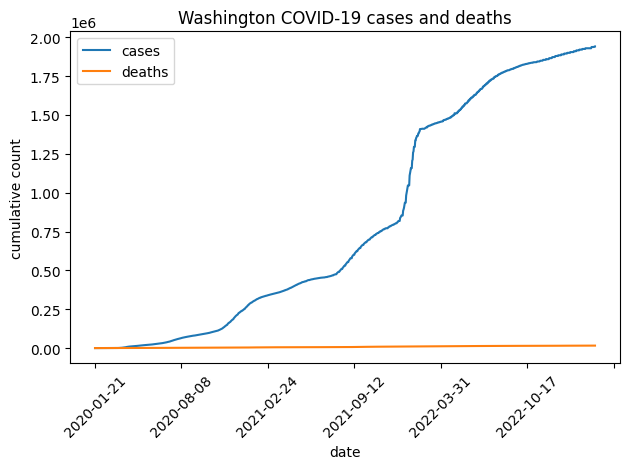

In [ ]:
# Let's have a closer look at cases and deaths in the state of Washington
washington_data = state_cases.loc[state_cases['state'] == 'Washington']
washington_data.plot(x = 'date', y = ['cases', 'deaths'], kind='line')
plt.title('Washington COVID-19 cases and deaths')
plt.ylabel('cumulative count')
plt.xlabel('date')
plt.xticks(rotation=45) # ensure the xtick labels don't overlap
plt.tight_layout()
plt.show()

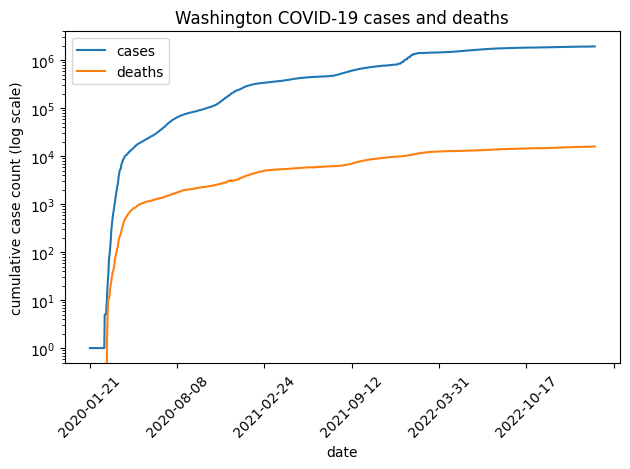

In [ ]:
# We could try and plot the yaxis on the log scale to see the dynamics of cases
# and deaths
washington_data = state_cases.loc[state_cases['state'] == 'Washington']
washington_data.plot(x = 'date', y = ['cases', 'deaths'], kind='line')
plt.title('Washington COVID-19 cases and deaths')
plt.ylabel('cumulative case count (log scale)')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.yscale('log') # set yaxis to a log scale
plt.tight_layout()
plt.show()

### Exercises

1. Set the index of the dataframe to be the date column
2. Subset the dataframe to a few states of your choice and plot a line plot for case counts in each state. *Take a look at the following methods `.loc`, `.isin` and `.groupby`*

### Solutions

In [ ]:
# @title
# Solution 1. Set the index of the dataframe to be the date column
state_cases.set_index('date', inplace=True)

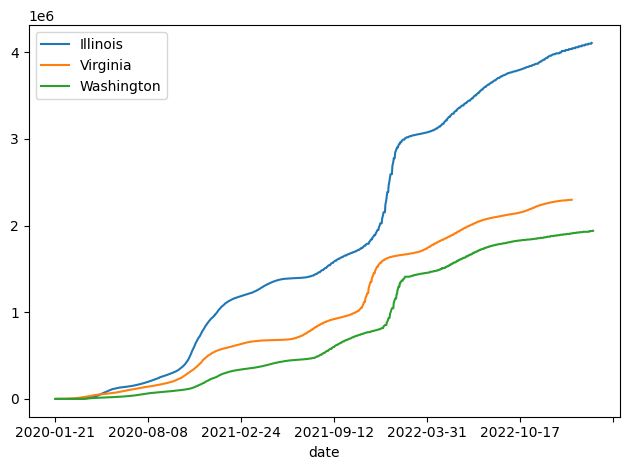

In [ ]:
# @title
#Solution 2. Subset the dataframe to a few states of your choice and plot a line plot for each state's cases. *Take a look at the following methods
subset = state_cases.loc[state_cases['state'].isin(['Washington','Virginia', 'Illinois'])]
subset.groupby('state')['cases'].plot(legend=True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Advanced Exercise
If you are feeling confident with what we have covered this morning, try coding up a SIR model in Python.

Take a look at some of your previous simulation code in your usual programming language and have a go at coding it up in Python.

Run a simulation and plot some epidemic curves.

### Solution: Simulation code

This is just an example of how you could code up a SIR model in discrete time.

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# initial values
time_delta = 1
init_state = [99,1,0]

In [ ]:
# @title
def sir_propagate(state, time_delta):

    # epidemic constants
    num_susceptibles, num_infected, num_removed = state
    num_pop = np.sum(state)

    beta = 0.02
    gamma = 0.1

    # Step 1: compute transition rates
    SI_rate = beta * num_infected
    IR_rate = gamma

    # Step 2:  converting event rates to probabilities
    i_rate = 1 - np.exp(- SI_rate * time_delta)
    r_rate = 1 - np.exp(- IR_rate * time_delta)

    # simulate one step forward
    num_new_infections = np.random.binomial(num_susceptibles, i_rate)
    num_new_removals = np.random.binomial(num_infected, r_rate)

    # update state of the system
    return [num_susceptibles - num_new_infections,
            num_infected + num_new_infections - num_new_removals,
            num_removed + num_new_removals]

In [ ]:
# @title
def simulate(initial_state, num_steps):
    # counters
    ii = 0
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)

    # unpack the state
    S[0], I[0], R[0] = initial_state
    state = initial_state

    while ii < num_steps:
        state = sir_propagate(state, time_delta)

        S[ii], I[ii], R[ii] = state

        ii += 1

    return {'Time': np.cumsum(np.repeat(time_delta, num_steps)),
            'Susceptible': S,
            'Infected': I,
            'Removed': R}

In [ ]:
# @title
sample_epi = simulate(init_state, 100) # simulate for 100 timesteps

### Solution: Plotting



Text(0.5, 1.0, 'Single path simulation')

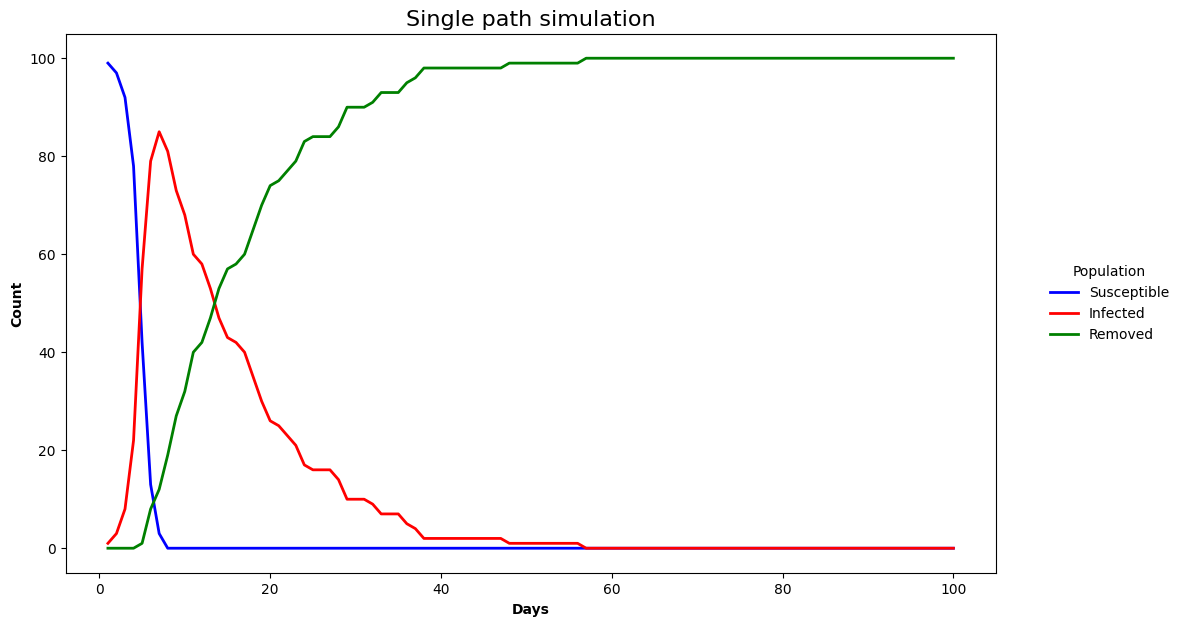

In [ ]:
# @title
plt.figure(figsize=(12, 7))

S_line = plt.plot("Time","Susceptible", data=sample_epi, color="b", linewidth=2)
I_line = plt.plot("Time","Infected", data=sample_epi, color="r", linewidth=2)
R_line = plt.plot("Time","Removed", data=sample_epi, color="g", linewidth=2)

plt.xlabel("Days",fontweight="bold")
plt.ylabel("Count",fontweight="bold")

legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.2,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

# Add labels and title
plt.xlabel('Days', fontweight="bold")  # Add x-axis label with font styling
plt.ylabel('Count', fontweight="bold")  # Add y-axis label with font styling
plt.title('Single path simulation', fontsize=16)  # Add plot title with font size